# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [109]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [110]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [111]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
}, axis=1, inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset? 

In [112]:
# df.YEAR.nunique()
df['YEAR'].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [113]:
ohio = df.where(df['STATE'] == 'OHIO').dropna()['AVG_MATH_4_SCORE'].mean()
michigan = df.where(df['STATE'] == 'MICHIGAN').dropna()['AVG_MATH_4_SCORE'].mean()

print("Michigan" if michigan >= ohio else "Darn, it's Ohio")

Darn, it's Ohio


Find the average for your outcome score across all states in 2019

In [114]:
df.where(df['YEAR'] == 2019).dropna(subset=['YEAR'])['AVG_MATH_4_SCORE'].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [115]:
max_outcome = df.groupby('STATE')['AVG_MATH_4_SCORE'].max().to_dict()
max_outcome

{'ALABAMA': 233.0,
 'ALASKA': 237.0,
 'ARIZONA': 240.0,
 'ARKANSAS': 240.0,
 'CALIFORNIA': 235.0,
 'COLORADO': 247.0,
 'CONNECTICUT': 245.0,
 'DELAWARE': 243.0,
 'DISTRICT_OF_COLUMBIA': 235.0,
 'DODEA': 250.0,
 'FLORIDA': 246.0,
 'GEORGIA': 240.0,
 'HAWAII': 243.0,
 'IDAHO': 242.0,
 'ILLINOIS': 239.0,
 'INDIANA': 249.0,
 'IOWA': 246.0,
 'KANSAS': 248.0,
 'KENTUCKY': 242.0,
 'LOUISIANA': 234.0,
 'MAINE': 246.0,
 'MARYLAND': 247.0,
 'MASSACHUSETTS': 253.0,
 'MICHIGAN': 238.0,
 'MINNESOTA': 253.0,
 'MISSISSIPPI': 241.0,
 'MISSOURI': 241.0,
 'MONTANA': 244.0,
 'NATIONAL': 242.0,
 'NEBRASKA': 246.0,
 'NEVADA': 237.0,
 'NEW_HAMPSHIRE': 253.0,
 'NEW_JERSEY': 249.0,
 'NEW_MEXICO': 233.0,
 'NEW_YORK': 243.0,
 'NORTH_CAROLINA': 245.0,
 'NORTH_DAKOTA': 246.0,
 'OHIO': 246.0,
 'OKLAHOMA': 240.0,
 'OREGON': 240.0,
 'PENNSYLVANIA': 246.0,
 'RHODE_ISLAND': 242.0,
 'SOUTH_CAROLINA': 238.0,
 'SOUTH_DAKOTA': 242.0,
 'TENNESSEE': 241.0,
 'TEXAS': 244.0,
 'UTAH': 244.0,
 'VERMONT': 248.0,
 'VIRGINIA': 248

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [116]:
df['FEDERAL_REVENUE_RATIO'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_RATIO'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']
df['LOCAL_REVENUE_RATIO'] = df['LOCAL_REVENUE'] / df['TOTAL_REVENUE']
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,FEDERAL_REVENUE_RATIO,STATE_REVENUE_RATIO,LOCAL_REVENUE_RATIO
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.113546,0.619298,0.267156
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.091431,0.420436,0.488133
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.104308,0.560051,0.335641
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.078921,0.630103,0.290976
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.051254,0.410648,0.538098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN,NaN


Feature engineering justification: **Revenue source ratios reflect the financial priorities and level of investment from various government tiers in education, which could directly influence the quality of schooling and resources available to students, thereby affecting academic performance.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

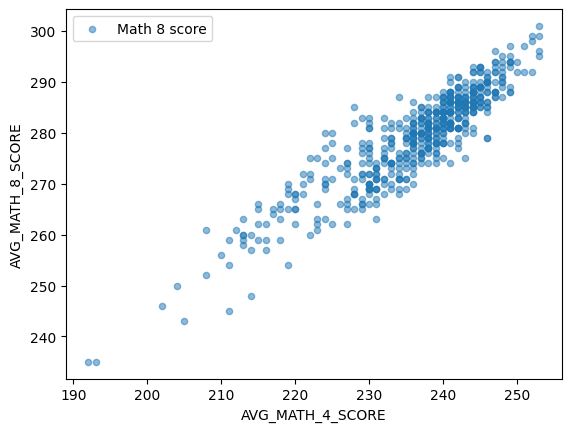

In [117]:
# Scatter plot for AVG_MATH_4_SCORE vs. AVG_MATH_8_SCORE
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.5, label='Math 8 score')

**Plot of average 4th grade math score vs. the average 8th grade math score, displaying a strong correlation as we move up grade levels.**

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_8_SCORE'>

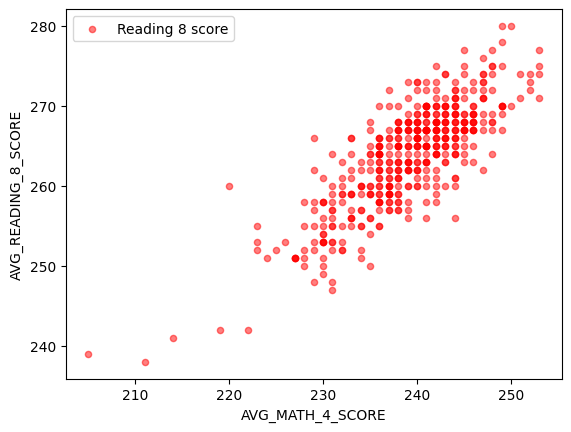

In [118]:
# Scatter plot for AVG_MATH_4_SCORE vs. AVG_READING_8_SCORE (as another predictor)
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.5, color='red', label='Reading 8 score')

**Plot of average 4th grade math score vs. the average 8th grade reading score, displaying a strong correlation, though not as strong as 4th vs 8th grades math. Skills issue?**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df[['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [121]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [122]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [123]:
# create your model here
model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [126]:
print("Model score: ", model.score(X_test, y_test))
# mean error
print("Mean error: ", np.mean(model.predict(X_test)-y_test))
# mean absolute error
print("Mean absolute error: ", np.mean(np.abs(model.predict(X_test)-y_test)))
# root mean squared error -- penalizes large errors
print("Root mean squared error: ", np.mean((model.predict(X_test)-y_test)**2)**0.5)

Model score:  0.9035709323987807
Mean error:  0.5294559859465586
Mean absolute error:  1.5231348476392566
Root mean squared error:  1.933698191735131


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

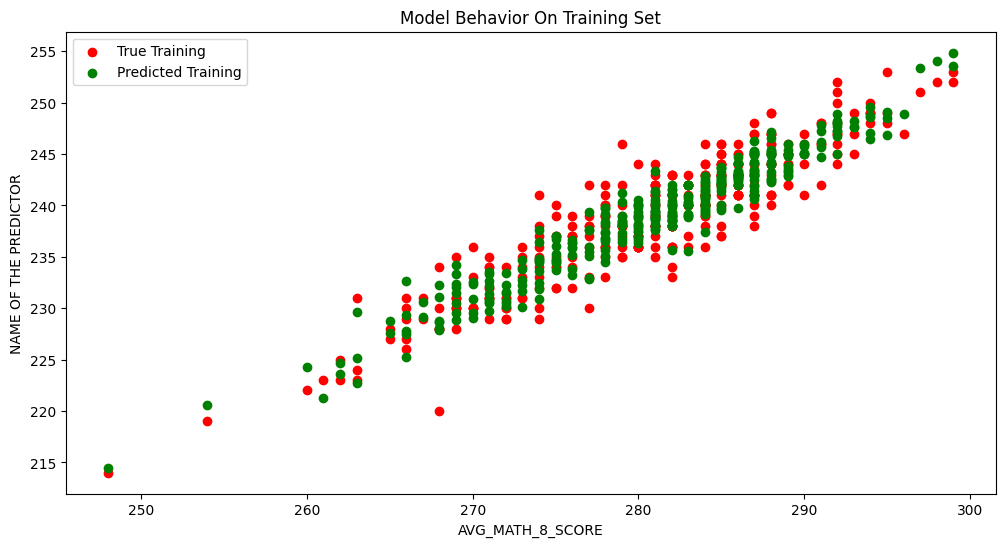

In [127]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

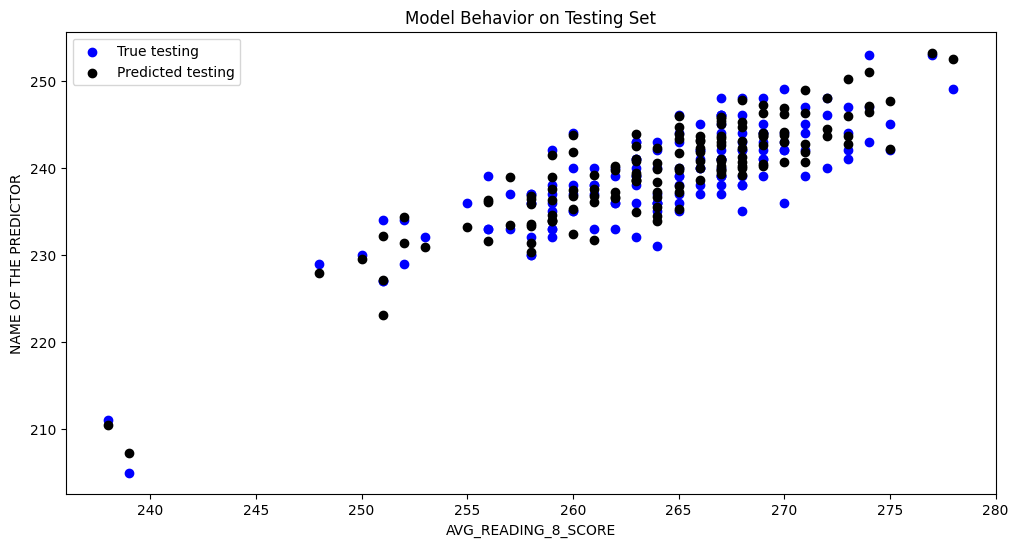

In [131]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**I implemented a linear regression model to predict 4th grade math scores using 4th grade reading, 8th grade math, and 8th grade reading scores as predictors. The model achieved a high coefficient of determination on the test set with a score of 0.903, indicating that it can explain a significant portion of the variance in 4th grade math scores. However, the mean absolute error of 1.523 and root mean squared error of 1.934 suggest that while the model's predictions are generally close to the true values, there is still a noticeable average deviation, highlighting room for potential improvement in prediction accuracy.**